# Data Science CoderHouse #61690

### Alumno: Miguel Peralta

##Introducción
En el contexto actual de la industria bancaria, la retención de clientes se ha convertido en un aspecto crítico para el éxito y la sostenibilidad de las instituciones financieras. La capacidad de identificar con precisión a los clientes que tienen una mayor probabilidad de abandonar el banco permite a las instituciones financieras tomar decisiones más informadas y diseñar estrategias efectivas de retención.

##Objetivo
El objetivo de este análisis es examinar el conjunto de datos y utilizar técnicas de análisis para obtener insights que permitan entender mejor los factores que influyen en el abandono de clientes. Este proyecto se centra en explorar un conjunto de datos que refleja diversas características de los clientes del banco, con el objetivo de construir un modelo de clasificación que prediga si un cliente abandonará o no su relación con la entidad.

##Fuente
Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data


## Importación de Librerías y Carga de Datos

In [6]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Importar dataset desde Kaggle
df = pd.read_csv('Bank Customer Churn Prediction.csv')

## Exploración de Datos

In [9]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Como se puede observar, el dataset no cumple con el requisito de contar mínimo con 15 columnas. Por lo tanto, procederemos a agregar tres columnas adicionales que contengan datos aleatorios. Es importante destacar que estas nuevas columnas no afectarán el desarrollo del análisis.

In [10]:
# Agregar columnas 'marital_status, employment_status y preferred_channel'
marital_status = ['Single', 'Married', 'Divorced', 'Widowed']
df['marital_status'] = np.random.choice(marital_status, size=len(df))

employment_status = ['Employed', 'Unemployed', 'Retired', 'Self-employed']
df['employment_status'] = np.random.choice(employment_status, size=len(df))

channels = ['Online', 'Branch', 'Mobile', 'ATM']
df['preferred_channel'] = np.random.choice(channels, size=len(df))

df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,marital_status,employment_status,preferred_channel
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Divorced,Self-employed,Branch
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Single,Retired,ATM
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Divorced,Retired,ATM
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Single,Employed,Online
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Single,Employed,Branch


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [13]:
df.info()
rows = len(df)
columns = len(df.columns)
print(f"El conjunto de datos tiene {rows} filas y {columns} columnas.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        10000 non-null  int64  
 1   credit_score       10000 non-null  int64  
 2   country            10000 non-null  object 
 3   gender             10000 non-null  object 
 4   age                10000 non-null  int64  
 5   tenure             10000 non-null  int64  
 6   balance            10000 non-null  float64
 7   products_number    10000 non-null  int64  
 8   credit_card        10000 non-null  int64  
 9   active_member      10000 non-null  int64  
 10  estimated_salary   10000 non-null  float64
 11  churn              10000 non-null  int64  
 12  marital_status     10000 non-null  object 
 13  employment_status  10000 non-null  object 
 14  preferred_channel  10000 non-null  object 
dtypes: float64(2), int64(8), object(5)
memory usage: 1.1+ MB
El conjunto de

El conjunto de datos contiene un total de 10,000 filas (registros) y 15 columnas (variables).

Se observa que ninguna columna tiene valores faltantes (non-null count igual al número total de filas).

In [15]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**products_number:**
- En promedio los clientes tienen contratados aproximadamente 2 productos.
- Los clientes pueden tener como mínimo un producto y como máximo de 4 productos.

**age:**
- La edad promedio de los clientes es de aproximadamente 39.
- Los clientes más jóvenes son de 18 años (edad mínima para abrir una cuenta bancaria).
- Los clientes con más edad es de 92 años.

**credit_score:**
- El score promedio es de aproximadamente 651.
- El score mínimo es de 350 y el máximo es de 850.

**tenure:**
- El tiempo promedio que un cliente ha sido parte del banco es de aproximadamente 5 años.
- Los clientes más recientes no llevan ni un año en el banco.
- Los clientes con más antigüedad llevan 10 años en el banco.

**estimated_salary:**
- El salario promedio de los clientes es de aproximadamente 100,090.
- El salario más bajo es de aproximadamente 12 euros.
- El salario más alto es de aproximadamente 199,992 euros.

**balance:**
- El saldo promedio de los clientes es de aproximadamente 76,486 euros.
- El saldo más alto registrado es de aproximadamente 250,898 euros.
- El saldo más bajo registrado es de 0 euros.

In [16]:
# Distribución de valores categóricos
categorical_cols = ['country', 'gender', 'credit_card', 'active_member', 'marital_status', 'employment_status', 'preferred_channel']
print("Valores categóricos:")
for col in categorical_cols:
    print(f"\n{col} value counts:\n", df[col].value_counts())

Valores categóricos:

country value counts:
 country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

gender value counts:
 gender
Male      5457
Female    4543
Name: count, dtype: int64

credit_card value counts:
 credit_card
1    7055
0    2945
Name: count, dtype: int64

active_member value counts:
 active_member
1    5151
0    4849
Name: count, dtype: int64

marital_status value counts:
 marital_status
Widowed     2566
Single      2529
Divorced    2481
Married     2424
Name: count, dtype: int64

employment_status value counts:
 employment_status
Self-employed    2557
Employed         2532
Retired          2458
Unemployed       2453
Name: count, dtype: int64

preferred_channel value counts:
 preferred_channel
Branch    2531
Mobile    2496
Online    2492
ATM       2481
Name: count, dtype: int64


### Hipótesis planteadas

1. Existe una diferencia entre el nivel de abandono de hombres y mujeres
2. Los clientes activos son menos propensos a abandonar el banco en comparación con los clientes inactivos
3. Los clientes con mayor antigüedad en el banco tienen menos probabilidad de abandonar el banco
4. Los clientes que tienen más productos del banco tienen una menor probabilidad de abandonar

#### Matplotlib

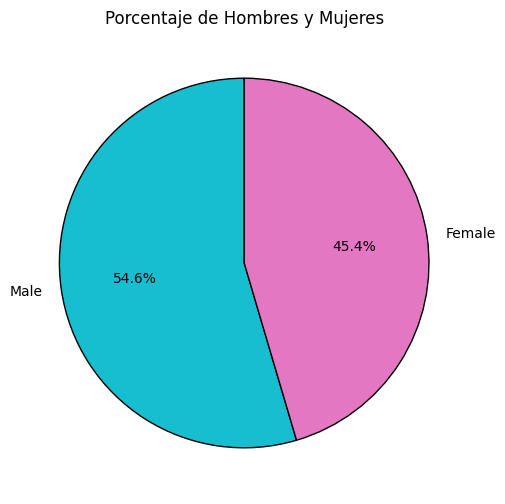

In [17]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#17becf','#e377c2'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Porcentaje de Hombres y Mujeres')
plt.show()

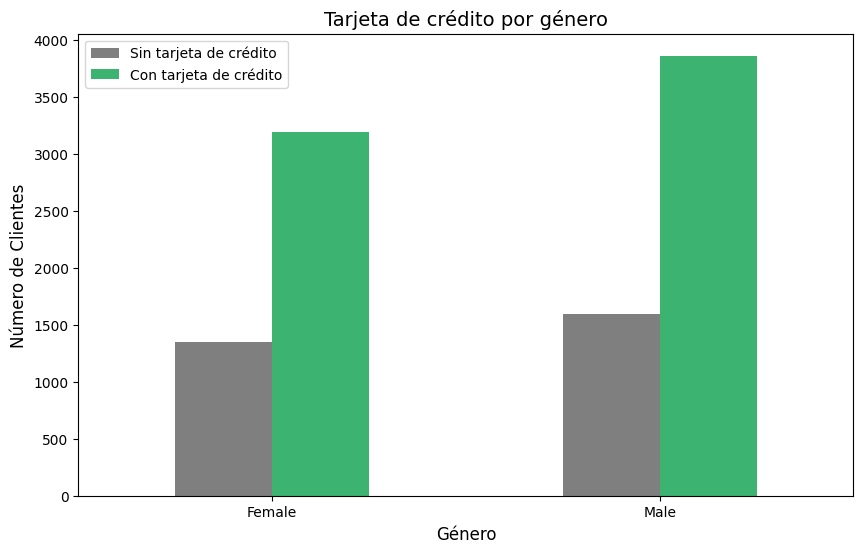

In [18]:
gender_credit = df.groupby(['gender', 'credit_card']).size().unstack()

gender_credit.plot(kind='bar', stacked = False, color = ['#7f7f7f', '#3CB371'], figsize=(10,6))

plt.title('Tarjeta de crédito por género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Sin tarjeta de crédito', 'Con tarjeta de crédito'])
plt.show()

<Figure size 1200x600 with 0 Axes>

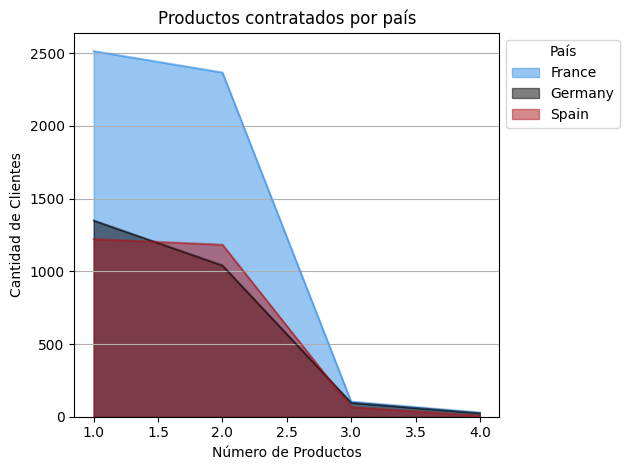

In [19]:
grouped_data = df.groupby(['products_number', 'country']).size().unstack()

plt.figure(figsize=(12, 6))
grouped_data.plot(kind='area', alpha=0.5, stacked=False, color=['#318ce7', '#000000', '#ad1519'])

plt.title('Productos contratados por país')
plt.xlabel('Número de Productos')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='País', bbox_to_anchor = (1, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Seaborn

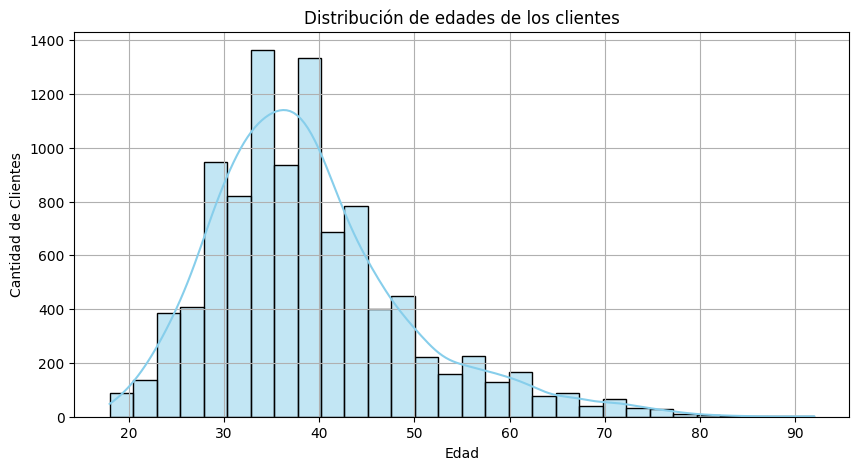

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de edades de los clientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.grid()
plt.show()

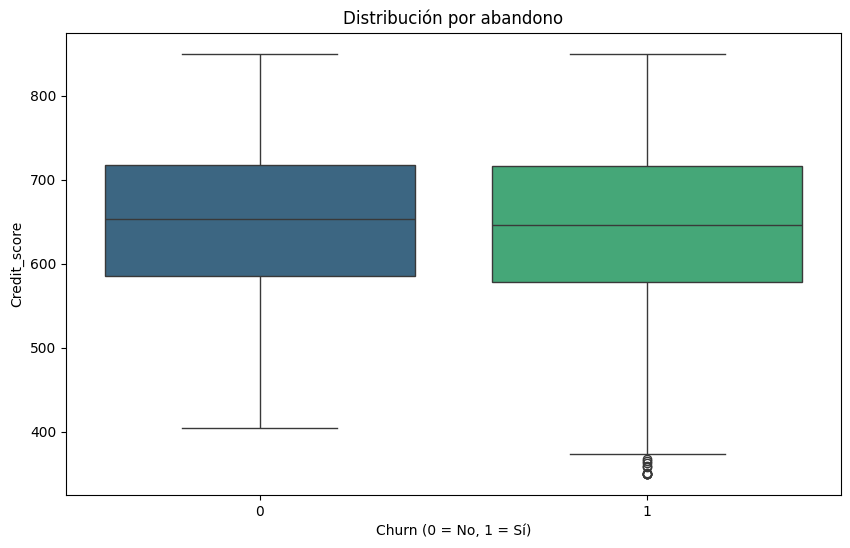

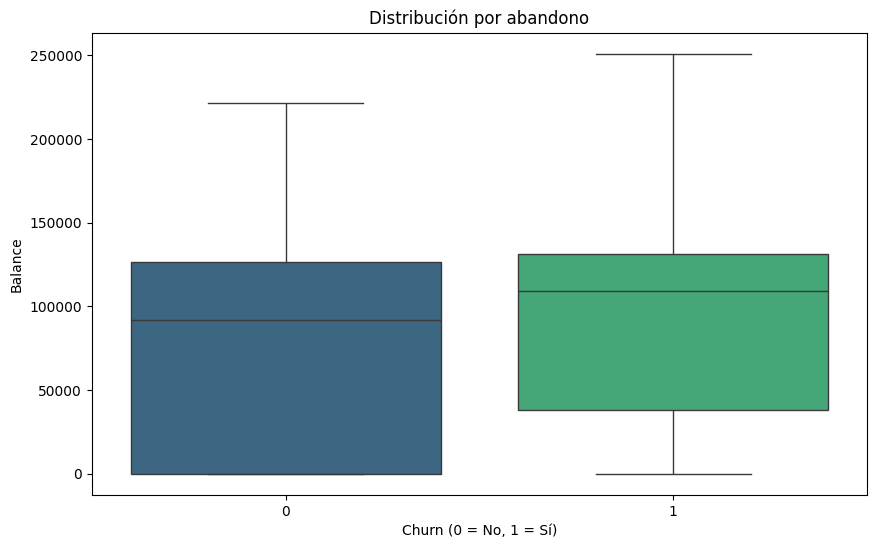

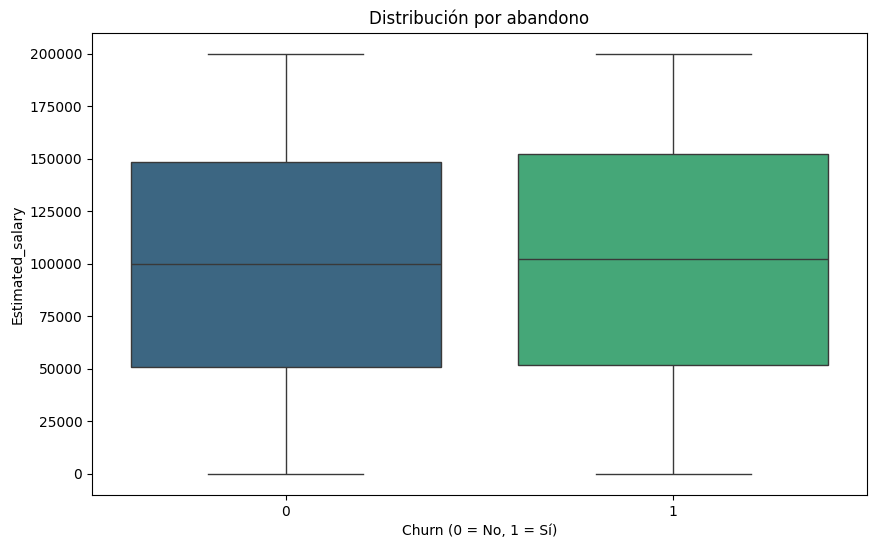

In [21]:
features = ['credit_score', 'balance', 'estimated_salary']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='churn', y=feature, data=df, hue='churn', palette="viridis", legend=False)
    plt.title(f'Distribución por abandono')
    plt.ylabel(f'{feature.capitalize()}')
    plt.xlabel('Churn (0 = No, 1 = Sí)')
    plt.show()